(-4, 10)

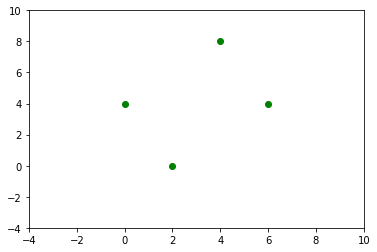

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# Matplotlib magic
%matplotlib inline
np.random.seed(5)

# Define original centers
centers_x = [0, 2, 4, 6]
centers_y = np.array([4, 0, 8, 4])

# Plot original centers
plt.scatter(centers_x, centers_y, color='green', label='original centers')
plt.xlim(-4, 10)
plt.ylim(-4, 10)

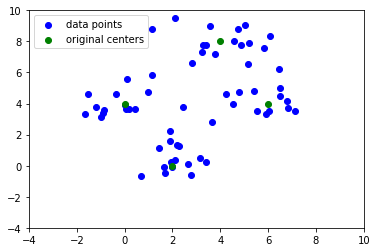

In [146]:
centers = np.dstack((centers_x, centers_y))[0] # format centers into [(x1,y1), (x2,y2), ...] instead of (x, y)
num_centers = 4

# Make datapoints and add noise to datapoints
data = make_blobs(n_samples=len(centers) * 15, n_features=2, centers=centers, cluster_std=1)
noisy_x, noisy_y = np.dstack(data[0])[0] # np.dstack(data[0])[0] := [x, y]

# Plot noisy data points
plt.scatter(noisy_x, noisy_y, color='blue', label='data points')
plt.scatter(centers_x, centers_y, color='green', label='original centers')

# Set x axis and y axis
plt.xlim((-4, 10))
plt.ylim((-4, 10))

# Plot
plt.legend()
plt.show()

In [147]:
def plot_kernel_bandwidths(centroids, kernel_bandwidth):
    """
    Plots centroids radii given the radius (AKA kernel_bandwidth)
    """
    for centroid in centroids:
        circle = plt.Circle(centroid, radius=kernel_bandwidth, color='red', fill=False)
        plt.gcf().gca().add_artist(circle)

    
def euclidean_distance(p1, p2):
    """
    Finds euclidean distance between 2 points. Specifically, if p1=(x1, y1) and
    p2=(x2, y2), finds sqrt((x1-x2)^2 + (y1-y2)^2)
    """
    return np.sqrt(sum([(p1[i]-p2[i])**2 for i in range(len(p1))]))


def mean_shift(centroid, original_points, kernel_bandwidth=4): 
    """
    For each centroid, divides the centroid into it's dimensional vectors (e.g. (x, y, z, ...))
    and sets the centroids vectors equal to the average respective vector of every data point within
    the centroids radius
    """
    avg_x = 0
    avg_y = 0
    num_neighbors = 0
    finished = 0
    for point in original_points:
        dist = euclidean_distance(centroid, point)
        # If data point is within the centroids radius/kernel_bandwidth then update centroid
        if dist < kernel_bandwidth:
            avg_x += point[0]
            avg_y += point[1]
            num_neighbors += 1
    
    # Note that because each centroid is initialized at a data point in mean shift,
    # num_neighbors must be at least 1 therefore a divide by zero error shouldn't happen
    return np.array([avg_x/num_neighbors, avg_y/num_neighbors]) # return average

In [148]:
def plot_results(centroids, original_points, centers, kernel_bandwidth, epoch):
    """
    Plots kernel bandwidth graphs side by side with original centers and centroid graph
    """
    noisy_x, noisy_y = original_points
    
    # Plot Left Graph
    plt.subplot(1, 2, 1)
    plot_kernel_bandwidths(centroids, kernel_bandwidth)
    plt.scatter([x for x,y in centroids], [y for x,y in centroids], color='yellow', label='centroids')
    plt.scatter(noisy_x, noisy_y, color='blue', label='data points')
    plt.legend()
    plt.xlim((-4, 10))
    plt.ylim((-4, 10))

    # Plot Right Graph
    plt.subplot(1, 2, 2)
    plt.scatter([x for x,y in centroids], [y for x,y in centroids], color='yellow', label='mean-shift centers')
    plt.scatter(centers[0], centers[1], color='green', label='original centers')
    plt.legend()
    plt.xlim((-4, 10))
    plt.ylim((-4, 10))
    
    # Set title and show
    plt.suptitle('Epoch {0}'.format(epoch), fontsize=20)
    plt.show()
    plt.close()

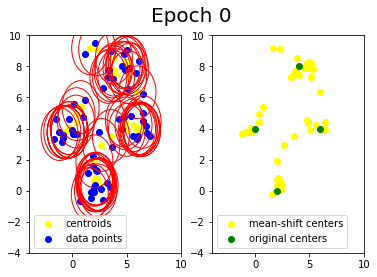

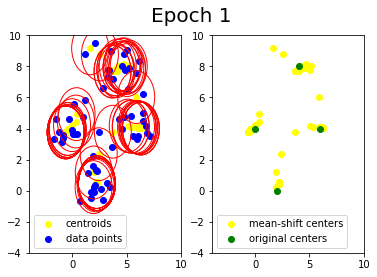

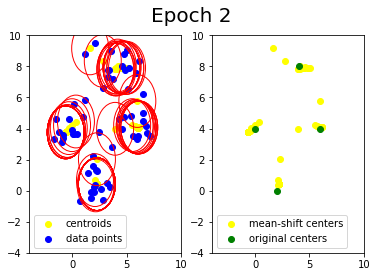

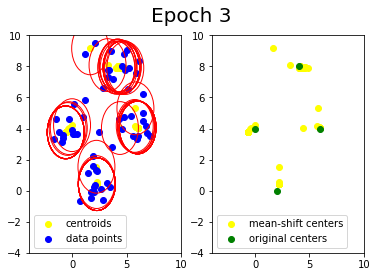

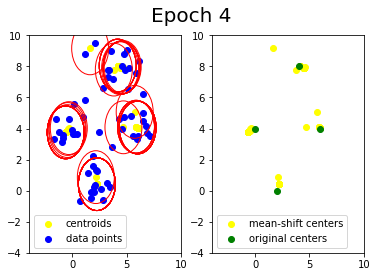

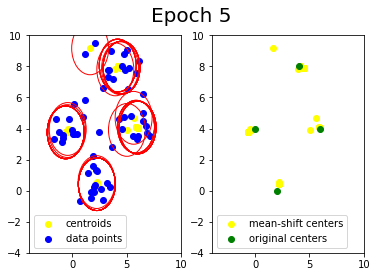

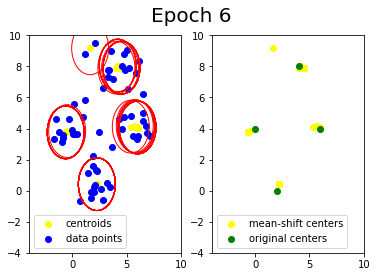

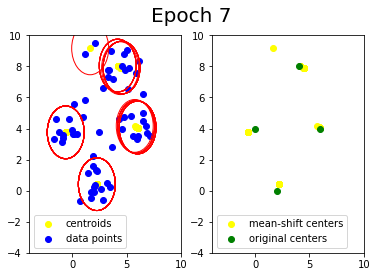

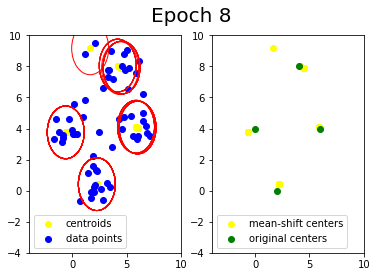

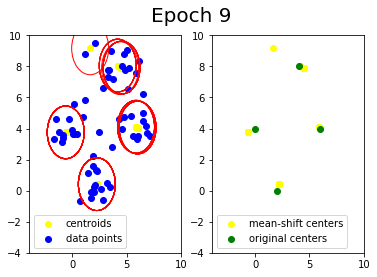

In [149]:
# [(x1,y1), (x2,y2), ...]
centroids = list(zip(noisy_x, noisy_y))
original_points = list(zip(noisy_x, noisy_y))

# Set number of mean_shift iterations and kernel_bandwidth
epochs = 10 
bandwidth = 1.7

# Update each centroid per epoch iteration
for epoch in range(epochs):
    for i in range(len(centroids)): 
        centroids[i] = mean_shift(centroids[i], original_points, kernel_bandwidth=bandwidth)
        
    # Plot epoch graphs every epoch
    plot_results(centroids, (noisy_x, noisy_y), (centers_x, centers_y), bandwidth, epoch)
    